<a href="https://colab.research.google.com/github/eutiagovski/amex-default-predicition/blob/main/data-exploring/Amex_Default_Data_Exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first imports

import os
import gc
import glob
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_rows', 100)
pd.set_option('max_columns', 300)

In [ ]:
# load data
# since the dataset given is to big, i am using a cleaned version, provided by @RADDAR at 

X_train = pd.read_parquet("/content/drive/MyDrive/kaggle/amex-default-predict/train.parquet")
y_train = pd.read_csv("/content/drive/MyDrive/kaggle/amex-default-predict/train_labels.csv")
# X_test = pd.read_parquet("/content/drive/MyDrive/kaggle/amex-default-predict/test.parquet")
submission = pd.read_csv('/content/drive/MyDrive/kaggle/amex-default-predict/sample_submission.csv')

Class=0, Count=340085, Percentage=0.74
Class=1, Count=118828, Percentage=0.26


Text(0, 0.5, 'Count')

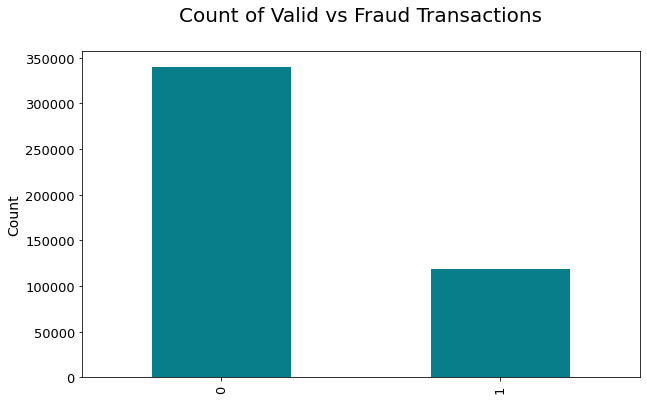

In [ ]:
from collections import Counter
#  observation 1

target = y_train.values[:, -1]
counter= Counter(target)

for k, v in counter.items():
  per= v / len(target * 100)
  print(f'Class={k}, Count={v}, Percentage={round(per, 2)}')

#This code is for the bar graph above
ax = y_train['target'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color="#087E8B")
ax.set_title("Count of Valid vs Fraud Transactions In Train", size=20, pad=30)
ax.set_ylabel("Count", fontsize=14)

### from challange

D_* = Delinquency variables

S_* = Spend variables

P_* = Payment variables

B_* = Balance variables

R_* = Risk variables

In [ ]:
# split intire dataset in columns groups

df = X_train.groupby(X_train.columns.str[:1], axis=1)

df_b = df.get_group('B')
df_s = df.get_group('S').drop(['S_2'],axis=1)
df_p = df.get_group('P')
df_d = df.get_group('D')
df_r = df.get_group('R')

1-Balance

In [ ]:
df_b

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_39,B_40,B_41,B_42
0,0.008724,1.006838,0.004709,6,0.170600,0.063902,0.059416,0.0,0.008207,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0,NaN,0.652984,0,0,0.002644,0,0.050882,0.004327,0.007729,0.000272,0.002310,0.084683,NaN,0,1,0,1,0.009968,0.004572,2,NaN,0.210060,0,NaN
1,0.004923,1.000653,0.002714,5,0.113239,0.065261,0.057744,0.0,0.008373,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0,NaN,0.647093,0,0,0.004193,0,0.040469,0.004203,0.001864,0.000979,0.001327,0.081843,NaN,0,1,0,1,0.003921,0.004654,2,NaN,0.184093,0,NaN
2,0.021655,1.009672,0.009423,5,0.060492,0.066982,0.056647,0.0,0.009355,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0,NaN,0.645819,0,0,0.001337,0,0.047454,0.001782,0.005419,0.006149,0.007624,0.081954,NaN,0,1,0,1,0.001264,0.019176,2,NaN,0.154837,0,NaN
3,0.013683,1.002700,0.005531,4,0.166782,0.083720,0.049253,0.0,0.006782,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0,NaN,0.654358,0,0,0.008716,0,0.031705,0.005595,0.000646,0.009193,0.000034,0.060634,NaN,0,1,0,1,0.002729,0.011720,2,NaN,0.153939,0,NaN
4,0.015193,1.000727,0.009312,3,0.143630,0.075900,0.048918,0.0,0.000519,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0,NaN,0.650112,0,0,0.006821,0,0.032733,0.004933,0.001833,0.005738,0.002109,0.062492,NaN,0,1,0,1,0.009998,0.017598,2,NaN,0.120717,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.020818,0.828199,0.025139,0,0.035575,0.122715,0.018121,0.0,0.013776,0.250840,0.010752,0.056982,0.052506,0.022302,0.010653,10,0.004504,0.442891,0,7,0.001555,0,0.009346,0.004816,0.021410,0.003812,0.001429,0.017920,NaN,0,1,0,0,0.003618,0.022897,3,NaN,0.002501,0,NaN
5531447,0.007209,0.812610,0.023691,1,0.029612,0.171524,0.021853,0.0,0.005645,0.284274,0.005119,0.058002,0.049879,0.012113,0.010991,9,0.177476,1.000000,0,0,0.001069,0,0.007823,0.006692,0.007603,0.002554,0.000454,0.024238,NaN,0,1,0,1,0.006475,0.013445,3,NaN,0.028988,0,NaN
5531448,0.013151,0.815422,0.012343,1,0.011857,0.181703,0.016139,0.0,0.004090,0.891591,0.008121,0.061328,0.045106,0.010745,0.012185,9,0.178055,1.000000,0,0,0.004273,0,0.013041,0.006302,0.000706,0.008164,0.003539,0.018846,NaN,0,1,0,1,0.004272,0.009061,3,NaN,0.026152,0,NaN
5531449,0.009855,1.003541,0.008578,0,0.019532,0.161841,0.014798,0.0,0.006628,0.298447,0.007431,0.048886,0.050585,0.003760,0.009884,8,0.007352,1.000000,0,0,0.002421,0,0.001800,0.000018,0.002338,0.000952,0.006227,0.009635,NaN,0,1,0,1,0.006566,0.008063,3,NaN,0.014737,0,NaN


2-Spends

In [ ]:
df_s

,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
0,0.124035,0.023381,0,0.161345,2896,0.065728,15,0.272008,524,4,0.002271,0.008033,0,0.002537,0,0.894090,0.135561,0.911191,0.974539,0.001243,0.676922
1,0.126750,0.030599,0,0.140951,2896,0.093935,15,0.188970,524,4,0.009810,0.000760,0,0.008427,0,0.902135,0.136333,0.919876,0.975625,0.004561,0.822281
2,0.123977,0.048367,0,0.112229,3166,0.084757,15,0.495308,702,4,0.009362,0.004056,0,0.007327,0,0.939654,0.134938,0.958699,0.974067,0.011736,0.853498
3,0.117169,0.030063,0,0.102838,2218,0.048382,15,0.508670,524,5,0.004876,0.006969,0,0.007053,0,0.913205,0.140058,0.926341,0.975499,0.007571,0.844667
4,0.117325,0.054221,0,0.094311,2896,0.039259,17,0.216507,524,4,0.007447,0.001770,0,0.007728,0,0.921026,0.131620,0.933479,0.978027,0.018200,0.811199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.090743,0.036700,0,0.055695,2218,0.021471,17,0.188514,524,5,0.008612,0.006024,0,0.003172,0,0.971546,0.132063,0.975162,0.970563,0.006208,0.257406
5531447,0.079886,0.008777,0,0.049632,2218,0.025450,11,0.188050,435,5,0.008065,0.000252,0,0.009408,0,0.878800,0.137596,0.900471,0.974740,0.004722,0.253864
5531448,0.100503,0.004308,0,0.051331,1021,0.025570,25,0.192534,0,5,0.005897,0.006164,0,0.006900,0,0.862615,0.138715,0.883456,0.972630,0.002910,0.345503
5531449,0.101802,0.004883,0,0.057164,1021,0.017040,29,0.187689,0,5,0.002804,0.001121,0,0.005462,0,0.872319,0.132014,0.886145,0.975976,0.001877,0.208531


In [ ]:
df_r

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
0,0.009228,0,0,0,0,0.008363,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.008949,0
1,0.006151,0,0,0,0,0.004030,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003205,0
2,0.006815,0,0,0,0,0.006838,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.000754,0
3,0.001373,0,0,0,0,0.008183,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.005338,0
4,0.007605,0,0,0,0,0.008605,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.003175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.003487,0,0,0,0,0.003234,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.009910,0
5531447,0.005904,0,0,0,0,0.007746,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.007353,0
5531448,0.003457,0,0,0,0,0.000888,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.004321,0
5531449,0.005117,0,0,0,0,0.009942,0.0,0,-1,0,0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-1,1.001776,0


In [ ]:
df_d

,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,0.0,NaN,NaN,0,0.708906,0.358587,0.525351,0.255736,-1,0.148698,4,0.207334,NaN,1.0,0.354596,0.152025,0.158612,8,0.199617,0.308233,0.091071,0,0,0,-1,6,0.009013,0,0.119403,0,NaN,1,1,NaN,NaN,0,0,0,0,1,0,0,0,-1,NaN,0,3,1,0,0,0,0.766688,1,1.004587,0.893734,-1,2,-1,0,NaN,-1,1.0,0,1,0.238250,0,5,0.232120,0.236266,0,0.702280,3,0,16,0,2,1,1.007819,1,0.0,0.0,NaN,0.004345,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0,0.0,NaN,NaN,0,0.712795,0.353630,0.521311,0.223329,-1,0.149723,4,0.202778,NaN,1.0,0.326757,0.156201,0.148459,8,0.151387,0.265026,0.086805,0,0,0,-1,6,0.007842,0,0.140611,0,NaN,1,1,NaN,NaN,0,0,0,0,1,0,0,0,-1,NaN,0,3,1,0,0,0,0.786007,1,1.004118,0.906841,-1,2,-1,0,NaN,-1,1.0,0,1,0.247217,0,5,0.243532,0.241885,0,0.707017,3,0,16,0,2,1,1.004333,1,0.0,0.0,NaN,0.007495,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,3,0.0,NaN,NaN,0,0.720884,0.334650,0.524568,0.189424,-1,0.151955,4,0.206629,NaN,1.0,0.304124,0.153795,0.139504,8,0.305883,0.212165,0.094001,0,0,0,-1,6,0.006025,0,0.075868,0,NaN,1,1,NaN,NaN,0,0,0,0,1,0,0,0,-1,NaN,0,3,1,0,0,0,0.806840,1,1.009285,0.928719,-1,2,-1,0,NaN,-1,1.0,0,1,0.239867,0,5,0.240768,0.239710,0,0.704843,3,0,16,0,2,1,1.007831,1,0.0,0.0,NaN,0.009227,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0,0.0,NaN,NaN,0,0.723997,0.323271,0.530929,0.135586,-1,0.151219,4,0.208214,NaN,1.0,0.275055,0.155772,0.138100,8,0.273553,0.204300,0.094854,0,0,0,-1,6,0.005271,0,0.150209,0,NaN,1,1,NaN,NaN,0,0,0,0,1,0,0,0,-1,NaN,0,3,1,0,0,0,0.808214,1,1.004514,0.935383,-1,2,-1,0,NaN,-1,1.0,0,1,0.240910,0,5,0.239400,0.240727,0,0.711546,3,0,16,0,2,1,1.003460,1,0.0,0.0,NaN,0.007206,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0,0.0,NaN,NaN,0,0.720619,0.231009,0.529305,NaN,-1,0.154026,4,0.205468,NaN,1.0,0.231110,0.154914,0.126443,8,0.233103,0.175655,0.093915,0,0,0,-1,6,0.000152,0,0.096441,0,NaN,1,1,NaN,NaN,0,0,0,0,1,0,0,0,-1,NaN,0,3,1,0,0,0,0.822281,1,1.005735,0.953363,-1,2,-1,0,NaN,-1,1.0,0,1,0.247939,0,5,0.244199,0.242325,0,0.705343,3,0,16,0,2,1,1.005053,1,0.0,0.0,NaN,0.006312,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,14,0.0,NaN,0.014225,0,0.738777,0.395745,0.530723,0.062524,-1,0.087155,0,0.281378,NaN,1.0,0.039867,0.134237,0.001784,25,0.889792,0.005293,0.324893,4,0,0,-1,5,0.004116,0,0.009643,0,NaN,0,1,NaN,0.305819,0,0,0,0,1,0,0,0,-1,NaN,0,0,0,0,0,0,0.009640,0,0.000000,NaN,-1,0,-1,0,NaN,-1,1.0,1,1,0.021173,0,4,0.016894,0.016141,0,0.713049,2,0,11,0,2,1,1.003089,1,0.0,0.0,NaN,0.000776,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.001498,0
5531447,10,0.0,NaN,0.009467,0,0.744180,0.394486,0.534473,0.051502,-1,0.100331,0,0.286289,NaN,1.0,0.035277,0.141704,0.002997,24,0.171943,0.018179,0.328528,4,0,0,-1,5,0.005924,0,0.015031,0,NaN,0,0,NaN,0.303197,0,0,0,0,1,0,0,0,-1,NaN,0,0,0,0,0,0,0.005741,0,0.000000,NaN,-1,0,-1,0,NaN,-1,1.0,1,1,0.030905,0,4,0.031754,0.030034,0,0.715156,3,0,11,0,2,1,1.008834,1,0.0,0.0,NaN,0.001741,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.008225,0
5531448,15,0.0,NaN,0.006591,0,0.747021,0.396050,0.530051,0.032005,-1,0.094280,0,0.284209,NaN,1.0,0.022632,0.138062,0.002433,20,0.176868,0.013029,0.328972,4,0,0,-1,5,0.001011,0,0.012108,0,NaN,0,0,NaN,0.300316,0,0,0,0,1

In [ ]:
df_p

,P_2,P_3,P_4
0,0.938469,0.736463,0.0
1,0.936665,0.720886,0.0
2,0.954180,0.738044,0.0
3,0.960384,0.741813,0.0
4,0.947248,0.691986,0.0
...,...,...,...
5531446,0.979333,0.683896,0.0
5531447,0.984907,0.705934,0.0
5531448,0.983019,0.711415,0.0
5531449,0.969861,0.643626,0.0
